In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Аналіз датасет

In [2]:
print("Task #1")

bwc = pd.read_csv("bestsellers with categories.csv")
print(bwc)

Task #1
                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979    

In [3]:
print("Task #2")
print(bwc.head())

Task #2
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
print("Task #3")

shape_bwc = bwc.shape
print(f"Кількість рядків: {shape_bwc[0]}")
print(f"Кількість стовпців: {shape_bwc[1]}")

Task #3
Кількість рядків: 550
Кількість стовпців: 7


In [5]:
print("Про скільки книг зберігає дані датасет?")
print(f"Кількість книг: {shape_bwc[0]}")

Про скільки книг зберігає дані датасет?
Кількість книг: 550


In [6]:
print("Task #4")
bwc.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(bwc.head())

Task #4
                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


## Первинне дослідження даних

In [7]:
print("Task #1")
print(bwc.isna().sum())

Task #1
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [8]:
print("Чи є в якихось змінних пропуски?")
if bwc.isna().any().any():
    print("Так")
else:
    print("Ні")

Чи є в якихось змінних пропуски?
Ні


In [9]:
print("Task #2")

unique_genres = bwc['genre'].unique()
print(unique_genres)

Task #2
['Non Fiction' 'Fiction']


In [10]:
print("Які є унікальні жанри?")
print(', '.join(unique_genres))

Які є унікальні жанри?
Non Fiction, Fiction


Task #3


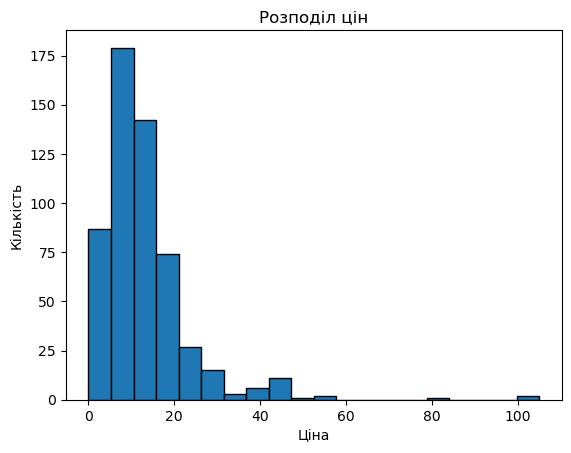

In [11]:
print("Task #3")

bwc['price'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

In [12]:
print("Task #3")

print(f"Максимальна ціна?\n {bwc['price'].max()}")
print(f"Мінімальна ціна?\n {bwc['price'].min()}")
print(f"Середня ціна?\n {bwc['price'].mean()}")
print(f"Медіанна ціна?\n {bwc['price'].median()}")

Task #3
Максимальна ціна?
 105
Мінімальна ціна?
 0
Середня ціна?
 13.1
Медіанна ціна?
 11.0


## Пошук та сортування даних

In [13]:
print(f"Який рейтинг у датасеті найвищий?\n{bwc['user_rating'].max()}\n")

print("Скільки книг мають такий рейтинг?")
max_rating = bwc['user_rating'].max()
num_books_highest_rating = bwc[bwc['user_rating'] == max_rating].shape[0]
print(f"{num_books_highest_rating}\n")

print("Яка книга має найбільше відгуків?")
book_max_reviews = bwc.loc[bwc['reviews'].idxmax()]
print(f"{book_max_reviews[['name', 'reviews']]}\n")

print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?")
books_2015 = bwc[bwc['year'] == 2015]
most_expensive_2015 = books_2015.loc[books_2015['price'].idxmax()]
print(f"{most_expensive_2015[['name', 'price']]}\n")

print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?")
fiction_2010 = bwc[(bwc['year'] == 2010) & (bwc['genre'] == 'Fiction')]
print(f"{len(fiction_2010)}\n")

print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?")
books_4_9 = bwc[(bwc['user_rating'] == 4.9) & (bwc['year'].isin([2010, 2011]))]
print(f"{len(books_4_9)}\n")

print("Kниги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів:")
filtered_books = bwc[(bwc['year'] == 2015) & (bwc['price'] < 8)]
sorted_books = filtered_books.sort_values('price')
print(f"{sorted_books}\n")

print("Яка книга остання у відсортованому списку?")
last_book = sorted_books.tail(1)
print(last_book)

Який рейтинг у датасеті найвищий?
4.9

Скільки книг мають такий рейтинг?
52

Яка книга має найбільше відгуків?
name       Where the Crawdads Sing
reviews                      87841
Name: 534, dtype: object

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
name     Publication Manual of the American Psychologic...
price                                                   46
Name: 277, dtype: object

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
1

Kниги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів:
                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 

## Агрегування даних та з'єднання таблиць

In [14]:
print("Task #1")
result = bwc.groupby('genre')['price'].agg(['max', 'min'])
print("Максимальна ціна для жанру Fiction:", result.loc['Fiction']['max'])
print("Мінімальна ціна для жанру Fiction:", result.loc['Fiction']['min'])
print("Максимальна ціна для жанру Non Fiction:", result.loc['Non Fiction']['max'])
print("Мінімальна ціна для жанру Non Fiction:", result.loc['Non Fiction']['min'])

Task #1
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [15]:
print("Task #2")

author_book_count = bwc.groupby('author')['name'].agg(['count'])

print(f"Якої розмірності вийшла таблиця?")
author_book_count_shape = author_book_count.shape

print(f"Кількість рядків: {author_book_count_shape[0]}")
print(f"Кількість стовпців: {author_book_count_shape[1]}")

max_books_author = author_book_count.idxmax()[0]
max_books_count = author_book_count.max()[0]

print("Який автор має найбільше книг?\n", max_books_author)

print("Скільки книг цього автора?\n", max_books_count)

Task #2
Якої розмірності вийшла таблиця?
Кількість рядків: 248
Кількість стовпців: 1
Який автор має найбільше книг?
 Jeff Kinney
Скільки книг цього автора?
 12


In [16]:
print("Task #3")

author_avg_rating = bwc.groupby('author')['user_rating'].agg(['mean'])

min_rating_author = author_avg_rating.idxmin()[0]
min_avg_rating = author_avg_rating.min()[0]
print("У якого автора середній рейтинг мінімальний?\n", min_rating_author)
print("Який у цього автора середній рейтинг?\n", min_avg_rating)

author_book_count = bwc.groupby('author')['name'].agg(['count'])
author_info = pd.concat([author_book_count, author_avg_rating], axis=1)

sorted_author_info = author_info.sort_values(by=['count', 'mean'], ascending=[True, True])

print("Який автор перший у списку?\n", sorted_author_info.index[0])

Task #3
У якого автора середній рейтинг мінімальний?
 Donna Tartt
Який у цього автора середній рейтинг?
 3.9
Який автор перший у списку?
 Muriel Barbery


In [22]:
books_per_year = bwc.groupby('year')['name'].count()

year_with_least_books = books_per_year.idxmin()

print(f"Рік з найменшою кількістю книжок: {year_with_least_books}")

Рік з найменшою кількістю книжок: 2009


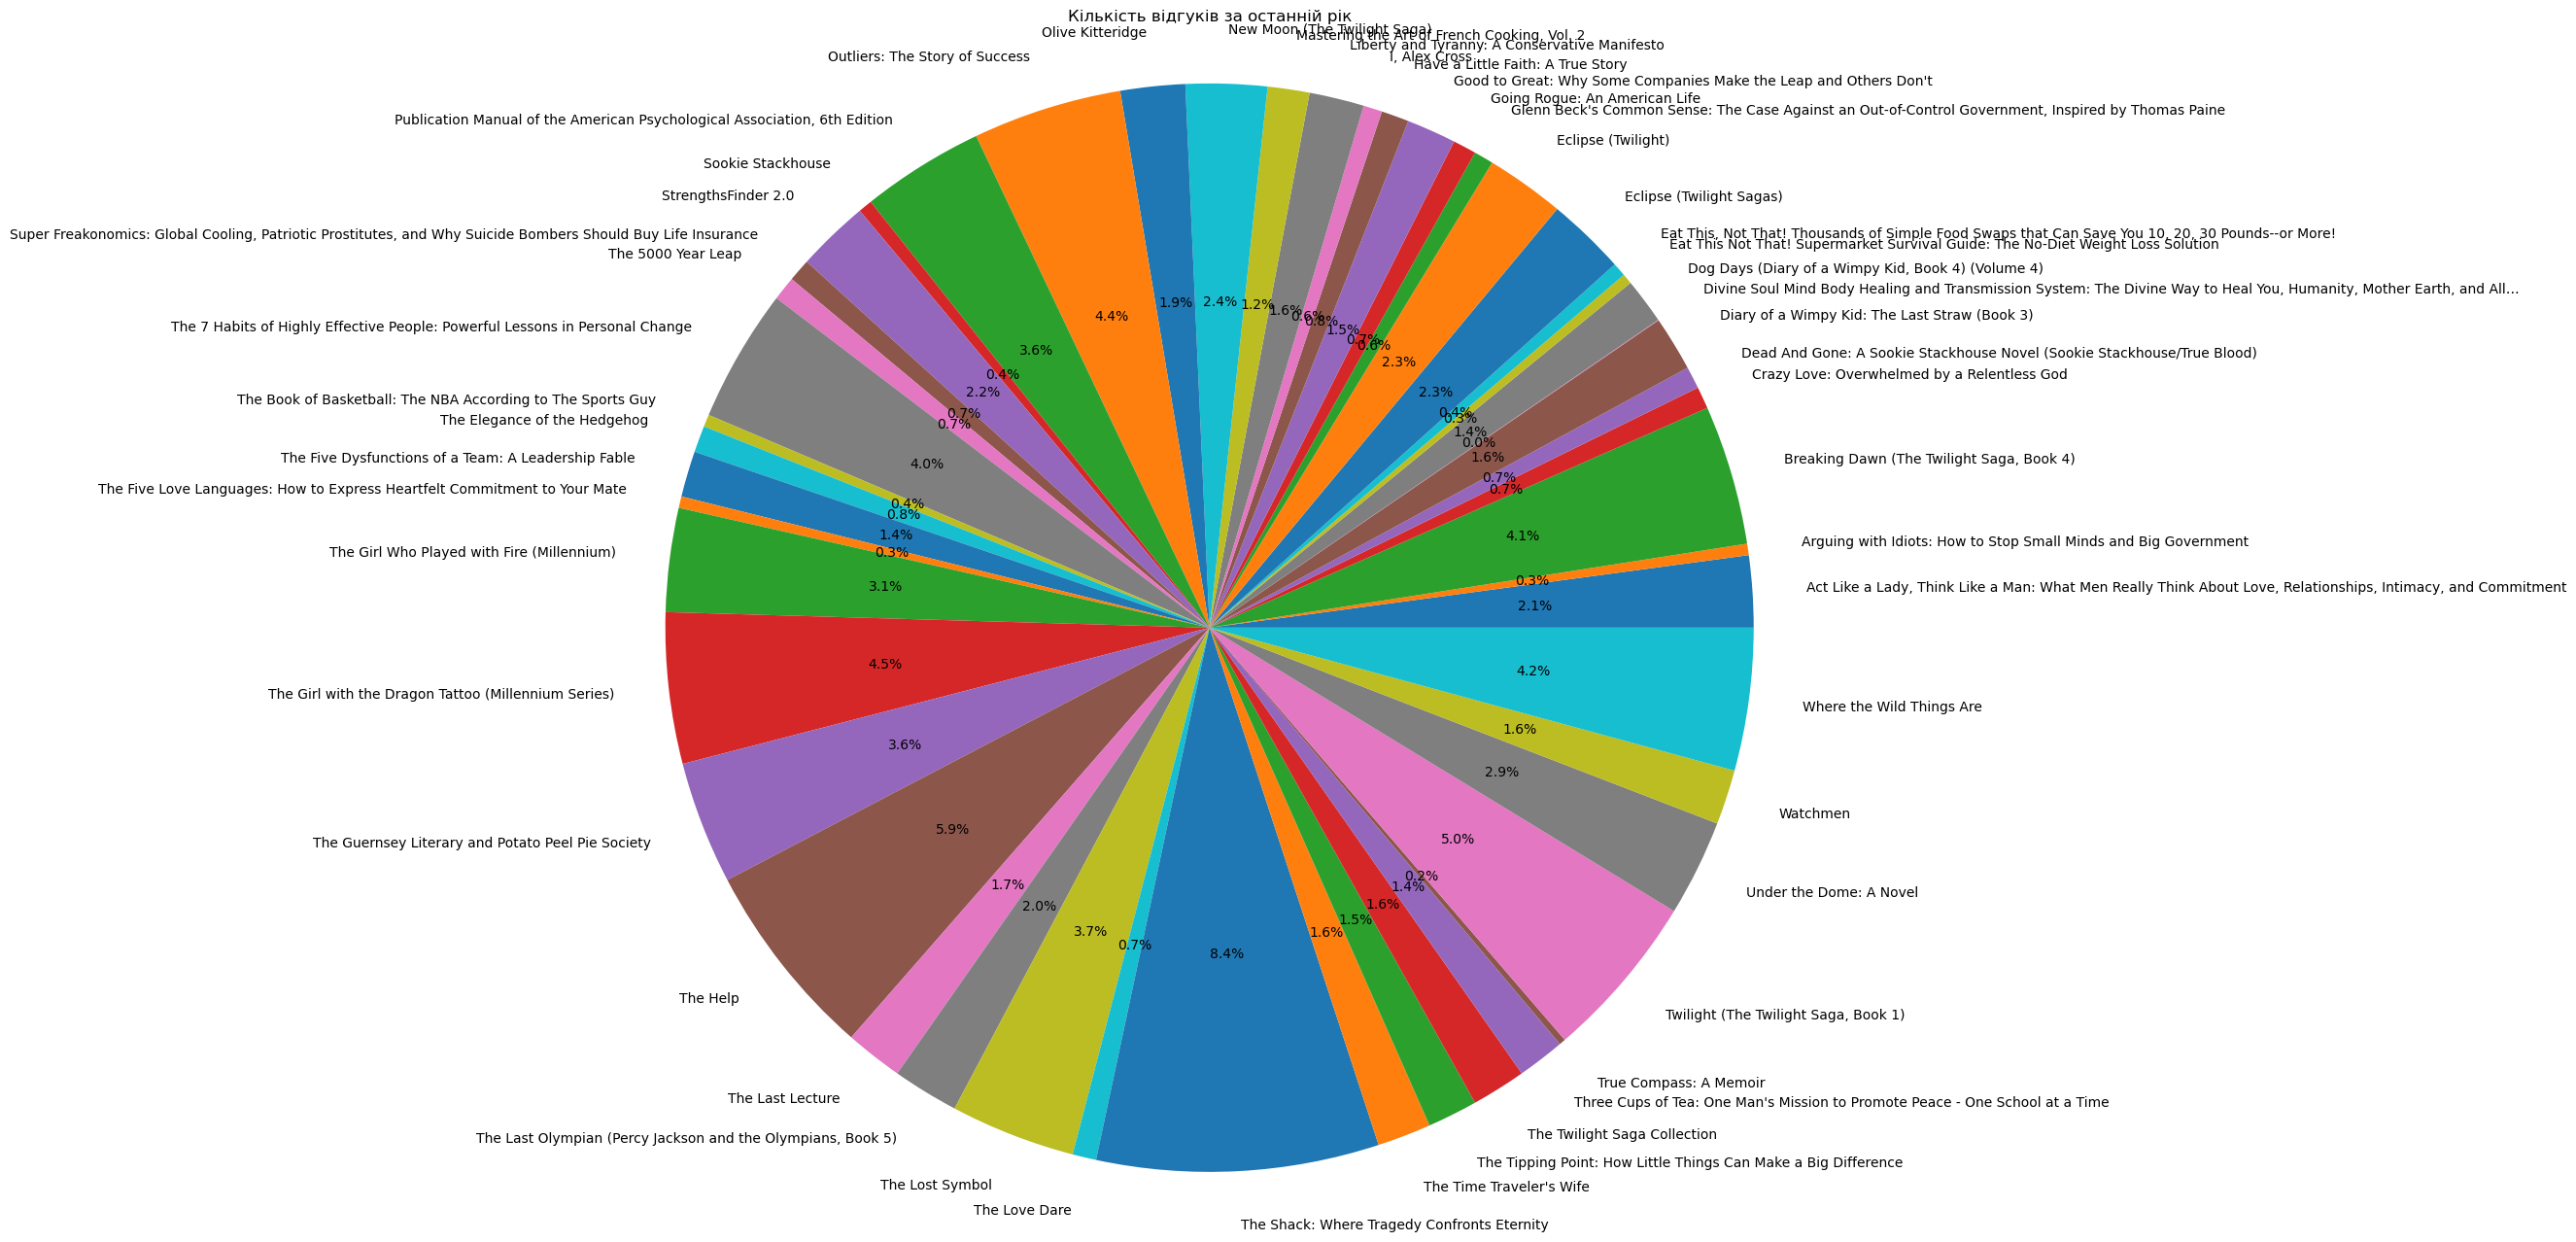

In [24]:
data_2019 = bwc[bwc['year'] == year_with_least_books]

books = data_2019['name']
reviews = data_2019['reviews']

plt.figure(figsize=(20, 16))
plt.pie(reviews, labels=books, autopct='%1.1f%%')
plt.title('Кількість відгуків за останній рік')
plt.axis('equal')
plt.show()